prepare the environment : 

In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


**data loading**

In [2]:
import pandas as pd

train = pd.read_csv("/kaggle/input/map-charting-student-math-misunderstandings/train.csv")

print(train.shape)
train.head()

(36696, 7)


,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NaN
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NaN
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NaN
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NaN
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NaN


**Dataset Overview**

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36696 entries, 0 to 36695
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              36696 non-null  int64 
 1   QuestionId          36696 non-null  int64 
 2   QuestionText        36696 non-null  object
 3   MC_Answer           36696 non-null  object
 4   StudentExplanation  36696 non-null  object
 5   Category            36696 non-null  object
 6   Misconception       9860 non-null   object
dtypes: int64(2), object(5)
memory usage: 2.0+ MB


**Categorical Feature Summary**

In [4]:
train.describe(include="object")

,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
count,36696,36696,36696,36696,9860
unique,15,49,35726,6,35
top,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),i think this because 24 divided by 2 is 12,True_Correct,Incomplete
freq,4857,2599,21,14802,1454


**Checking Missing Values**

In [5]:
train.isna().sum()

row_id                    0
QuestionId                0
QuestionText              0
MC_Answer                 0
StudentExplanation        0
Category                  0
Misconception         26836
dtype: int64

**Check for Duplicate Rows**

In [6]:
train.duplicated().any()

False

**Analyse target (Misconception)**

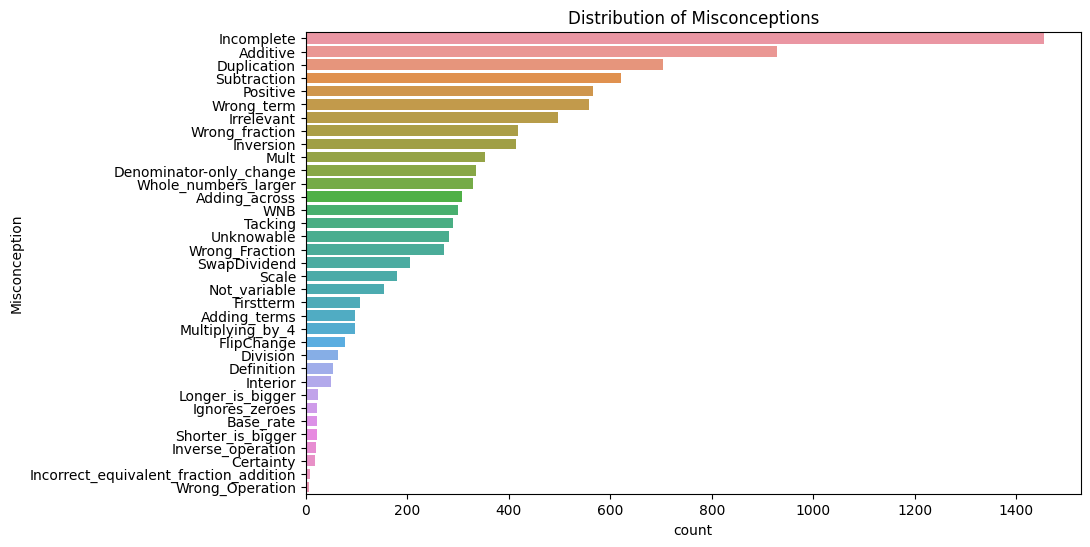

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

labeled = train[~train["Misconception"].isna()]
plt.figure(figsize=(10,6))
sns.countplot(y=labeled["Misconception"], order=labeled["Misconception"].value_counts().index)
plt.title("Distribution of Misconceptions")
plt.show()

Here, the most frequent misconception is Incomplete. Let’s examine how the Incomplete misconception appears and analyze its distribution across categories.

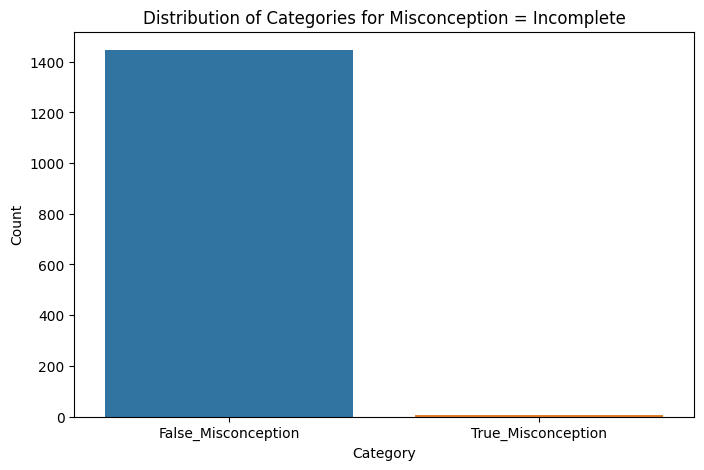

In [8]:
incomplete = train[train["Misconception"] == "Incomplete"]

plt.figure(figsize=(8,5))
sns.countplot(x=incomplete["Category"], order=incomplete["Category"].value_counts().index)
plt.title("Distribution of Categories for Misconception = Incomplete")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [9]:
incomplete = train[train["Misconception"] == "Incomplete"]

category_counts = incomplete["Category"].value_counts()
print(category_counts)

Category
False_Misconception    1446
True_Misconception        8
Name: count, dtype: int64


Most Incomplete misconceptions are labeled False_Misconception, with only a few True_Misconception entries, which is logical

**Examine Top Questions and Answers (False_Misconception) for Incomplete**

Now, we focus on the top questions and top answers that are labeled as False_Misconception within the Incomplete misconception.

This helps us understand which questions students commonly get wrong without it being a true misconception and what specific answers are incorrect, providing insights for feature analysis and modeling.

In [10]:
incomplete_false = incomplete[incomplete["Category"] == "False_Misconception"]
top_ids = incomplete_false["QuestionId"].value_counts().head(10).index
top_questions = incomplete_false[incomplete_false["QuestionId"].isin(top_ids)][["QuestionId", "QuestionText"]].drop_duplicates()

for i, row in top_questions.iterrows():
    print(f"QuestionId: {row['QuestionId']}\nQuestionText: {row['QuestionText']}\n")

QuestionId: 31772
QuestionText: What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded.]

QuestionId: 31777
QuestionText: A box contains \( 120 \) counters. The counters are red or blue. \( \frac{3}{5} \) of the counters are red.
How many red counters are there?

QuestionId: 33471
QuestionText: A bag contains \( 24 \) yellow and green balls. \( \frac{3}{8} \) of the balls are yellow. How many of the balls are green?



In [11]:
incomplete_false = incomplete[incomplete["Category"] == "False_Misconception"]

for i, explanation in enumerate(incomplete_false["StudentExplanation"][:100], 1):
    print(f"{i}: {explanation}\n")

1: 9 triangles in total and 3 are not shaded and 6 are.

2: Because there are 3 triangles not shaded in.

3: Because there are 6 spaces shaded out of 9 which leaves 3 spaces unshaded

4: Because three pieces are not shaded in

5: I think this because if the triangle is shading out of 9,and 3 are left,it has to be 3 over 9.

6: Only three is not shaded in and there is 9 in total.

7: The holder is 6 and is only 1 6 holder

8: There are 9 triangles and 3 are not shaded .you can not simplify three nineths so that is the answer

9: There are 9 triangles and 6 are shaded witch means there’s 3 non shaded

10: There are 9 triangles in totak and 3 are not shaded and 6 are.

11: because there are 6 triangles shaded and there are 9 all together

12: i think this because if the triangle is shading out of 9,and 3 are left it has to be 3 over 9

13: only three is not shaded in and there is 9 in toatle

14: there are 6 spaces shaded out of 9 which leaves 3 spaces unshaded

15: there are 6 spaces sha

We notice that many answers are exactly the same or very similar, which shows that students either express the same idea in different ways or may be copying each other.